In [1]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
import math 
from matplotlib.figure import Figure
pd.set_option('display.max_colwidth', None)

In [2]:
file=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx', sheet_name='Data')

In [3]:
file

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0


In [4]:
details=pd.read_excel('Bank_Personal_Loan_Modelling.xlsx')

In [5]:
details

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data Description:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,ID,Customer ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Age,Customer's age in completed years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Experience,#years of professional experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Income,Annual income of the customer ($000),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
file.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937913,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747666,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


In [7]:
file.Family.unique()

array([4, 3, 1, 2])

In [8]:
details

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,Data Description:,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,NaN,ID,Customer ID,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,NaN,Age,Customer's age in completed years,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,NaN,Experience,#years of professional experience,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,NaN,Income,Annual income of the customer ($000),NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
file.columns

Index(['ID', 'Age', 'Experience', 'Income', 'ZIP Code', 'Family', 'CCAvg',
       'Education', 'Mortgage', 'Personal Loan', 'Securities Account',
       'CD Account', 'Online', 'CreditCard'],
      dtype='object')

In [10]:
file.corr()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
ID,1.000000,-0.008473,-0.008326,-0.017695,0.013432,-0.016797,-0.024672,0.021463,-0.013920,-0.024801,-0.016972,-0.006909,-0.002528,0.017028
Age,-0.008473,1.000000,0.994215,-0.055269,-0.029216,-0.046418,-0.052030,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Experience,-0.008326,0.994215,1.000000,-0.046574,-0.028626,-0.052563,-0.050089,0.013152,-0.010582,-0.007413,-0.001232,0.010353,0.013898,0.008967
Income,-0.017695,-0.055269,-0.046574,1.000000,-0.016410,-0.157501,0.645993,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,0.013432,-0.029216,-0.028626,-0.016410,1.000000,0.011778,-0.004068,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.016797,-0.046418,-0.052563,-0.157501,0.011778,1.000000,-0.109285,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.024672,-0.052030,-0.050089,0.645993,-0.004068,-0.109285,1.000000,-0.136138,0.109909,0.366891,0.015087,0.136537,-0.003620,-0.006686
Education,0.021463,0.041334,0.013152,-0.187524,-0.017377,0.064929,-0.136138,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.013920,-0.012539,-0.010582,0.206806,0.007383,-0.020445,0.109909,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.024801,-0.007726,-0.007413,0.502462,0.000107,0.061367,0.366891,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802


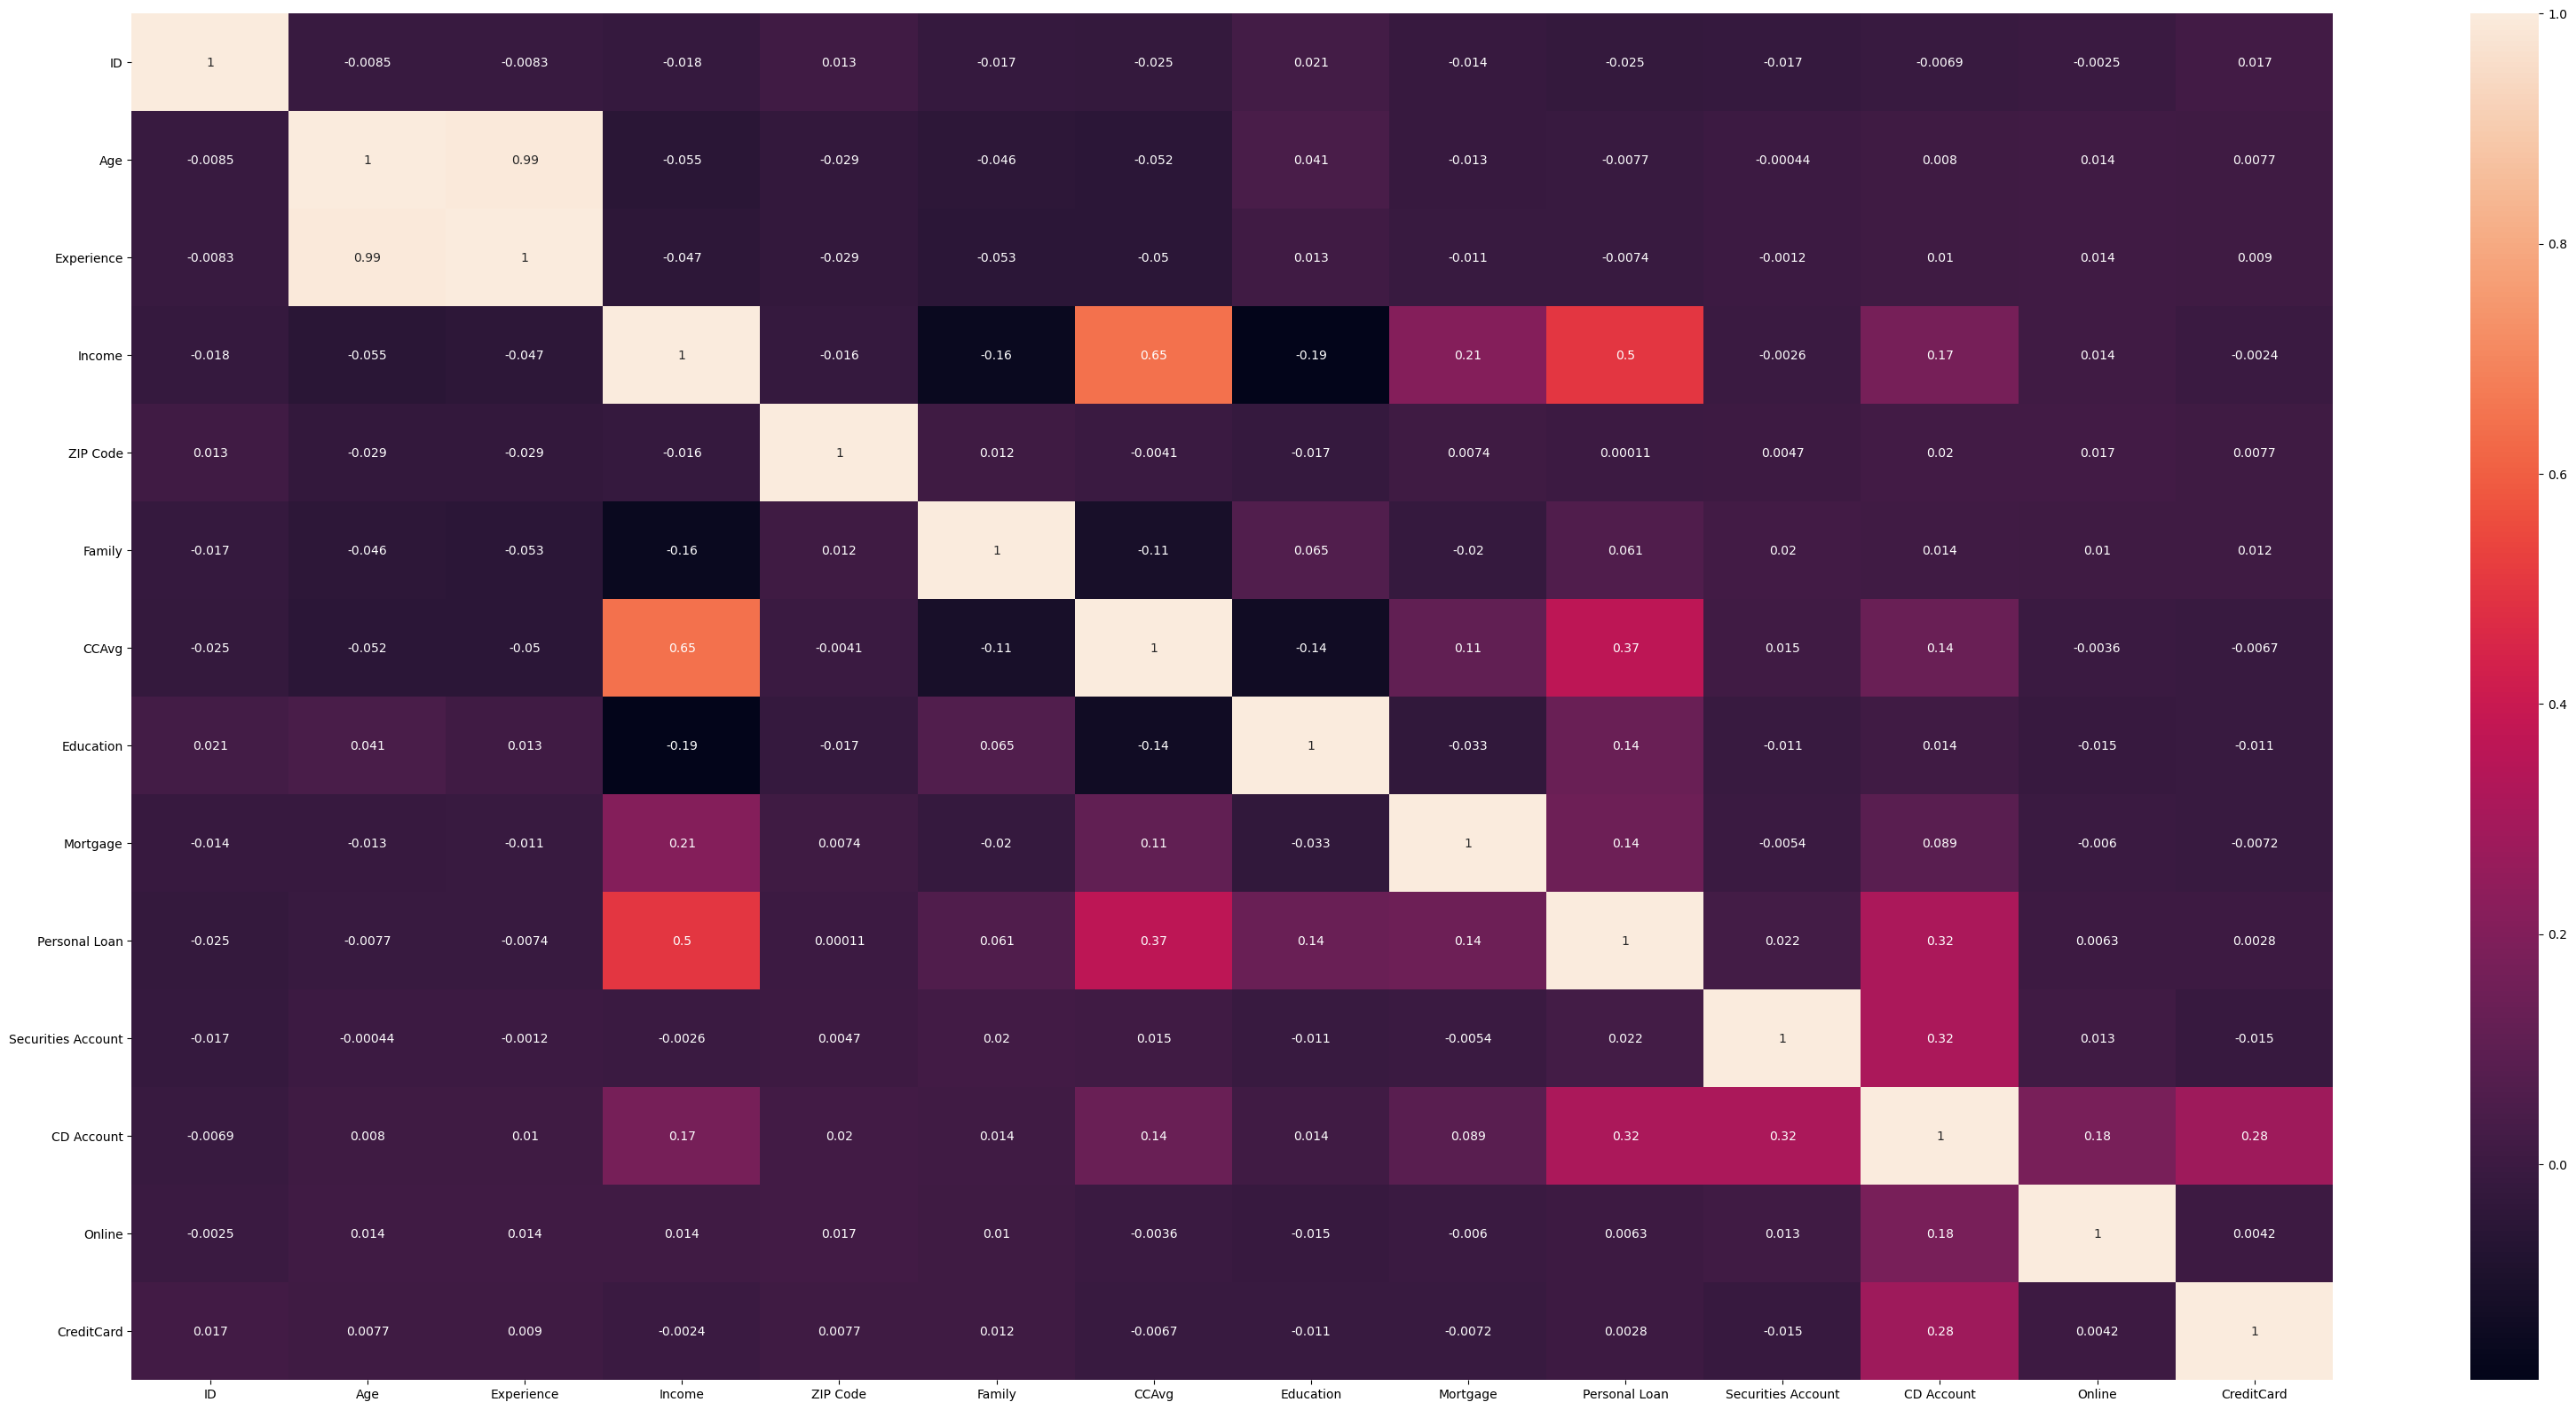

In [11]:
plt.figure(figsize=(40,20))
sns.heatmap(file.corr(), annot=True)
plt.show()

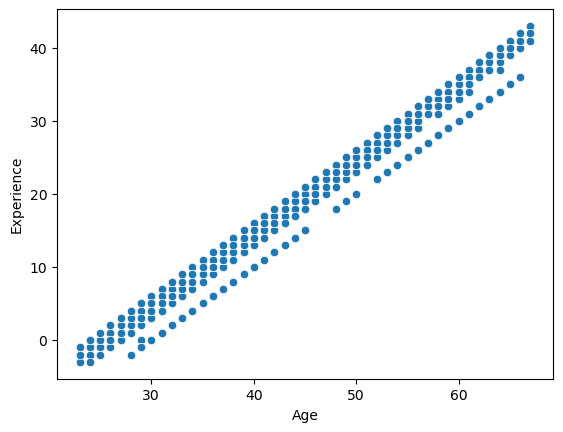

In [12]:
sns.scatterplot(data=file, x="Age", y="Experience")
plt.show()

### Age and Experience have a linear relationship so we can drop the experience column as it is a redundant feature in this analysis.


In [13]:
#file = file.drop('Experience', axis=1)

### The ID values are only used to identify customers so this column can also be dropped.

In [14]:
file = file.drop('Experience', axis=1)
index = file[["ID"]]
file = file.drop('ID', axis=1)

In [15]:
index

,ID
0,1
1,2
2,3
3,4
4,5
...,...
4995,4996
4996,4997
4997,4998
4998,4999


In [16]:
file

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,0,1,0


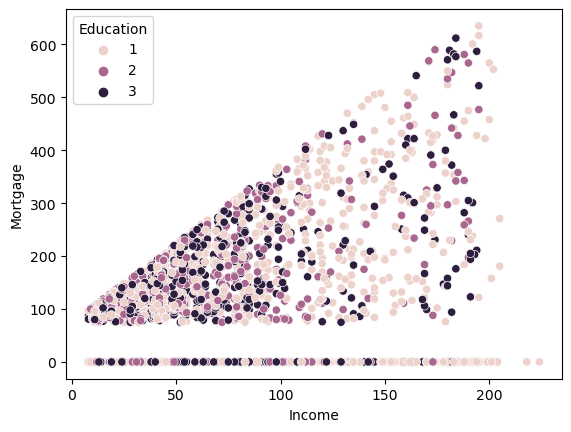

In [17]:
sns.scatterplot(data=file, x="Income", y="Mortgage", hue="Education")
plt.show()

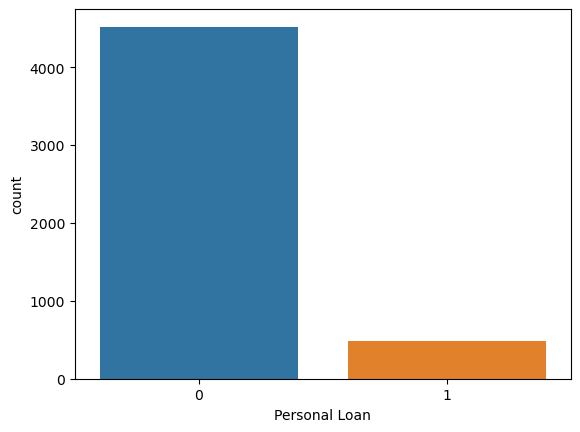

In [18]:
sns.countplot(x="Personal Loan", data=file)
plt.show()

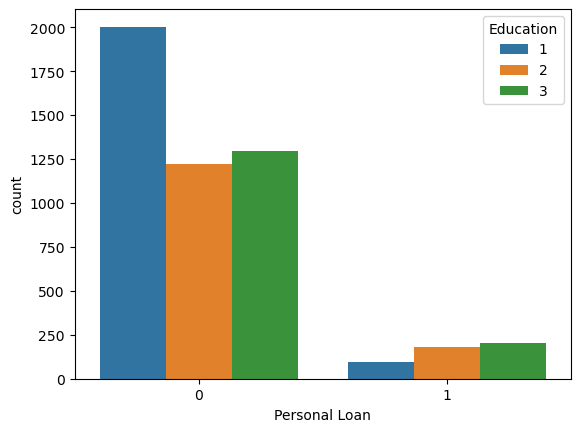

In [19]:
sns.countplot(x="Personal Loan", hue="Education", data=file)
plt.show()

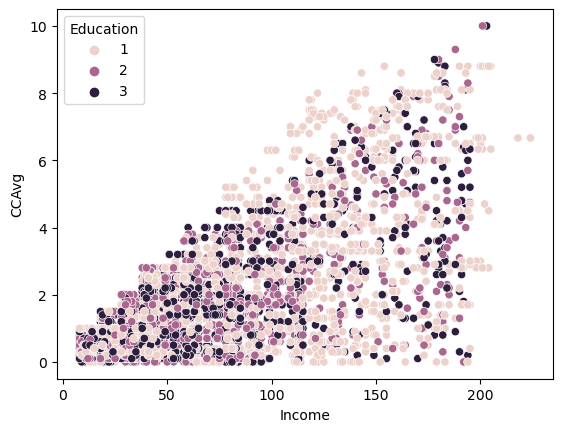

In [20]:
sns.scatterplot(data=file, x="Income", y="CCAvg", hue="Education")
plt.show()

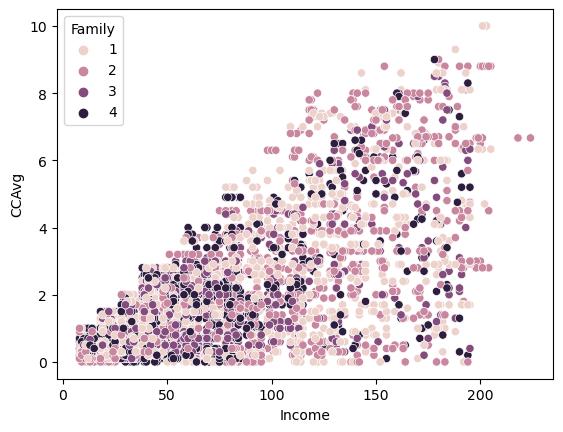

In [21]:
sns.scatterplot(data=file, x="Income", y="CCAvg", hue="Family")
plt.show()

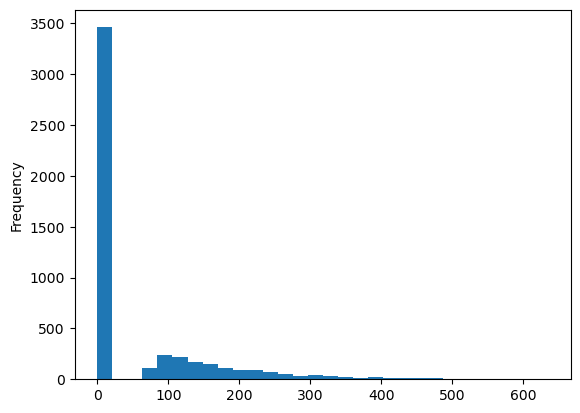

In [22]:
file["Mortgage"].plot.hist(bins=30)
plt.show()

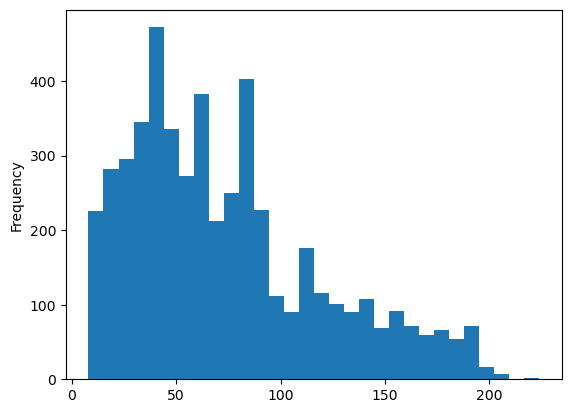

In [23]:
file["Income"].plot.hist(bins=30)
plt.show()

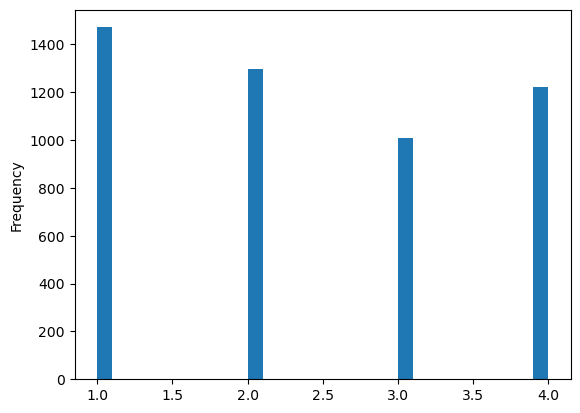

In [24]:
file["Family"].plot.hist(bins=30)
plt.show()

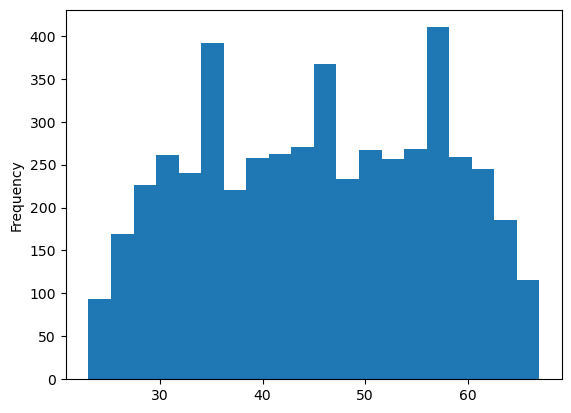

In [25]:
file["Age"].plot.hist(bins=20)
plt.show()

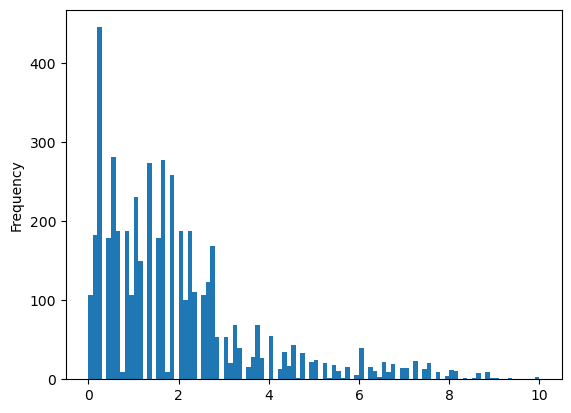

In [26]:
file["CCAvg"].plot.hist(bins=100)
plt.show()

In [27]:
y=file['Personal Loan']

In [28]:
X=file.drop('Personal Loan', axis='columns')

In [29]:
X

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
4995,29,40,92697,1,1.9,3,0,0,0,1,0
4996,30,15,92037,4,0.4,1,85,0,0,1,0
4997,63,24,93023,2,0.3,3,0,0,0,0,0
4998,65,49,90034,3,0.5,2,0,0,0,1,0


In [30]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split

!pip install category_encoders
%matplotlib inline

In [31]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=2)

In [32]:

print('Train', X_train.shape, y_train.shape)
print('Test', X_test.shape, y_test.shape)

Train (4000, 11) (4000,)
Test (1000, 11) (1000,)


In [33]:
print(X_train)

      Age  Income  ZIP Code  Family  CCAvg  Education  Mortgage  \
868    40     161     94596       2    3.3          1         0   
936    62      19     92109       1    1.5          3         0   
4034   35      82     94022       2    1.7          2         0   
1923   45      22     90639       1    0.2          1         0   
3330   34      32     95054       4    1.1          3         0   
...   ...     ...       ...     ...    ...        ...       ...   
3335   35     118     92069       2    7.8          1       358   
1099   30      52     92717       3    0.7          2         0   
2514   41      25     92182       2    0.1          2        91   
3606   43       9     96145       2    0.0          3        96   
2575   42      41     90401       3    0.5          3         0   

      Securities Account  CD Account  Online  CreditCard  
868                    1           0       0           1  
936                    1           0       0           0  
4034              

In [34]:
logmodel=LogisticRegression(solver='newton-cg', max_iter=10000)

##hyperparameter tuning

In [35]:
logmodel.fit(X_train, y_train)

/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:478: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:327: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/scipy/optimize/linesearch.py:437: LineSearchWarning: Rounding errors prevent the line search from converging
  warn(msg, LineSearchWarning)
/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/optimize.py:203: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


LogisticRegression(max_iter=10000, solver='newton-cg')

In [36]:

predictions=logmodel.predict(X_test)

In [37]:
#predictions

In [38]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

In [39]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.96      0.98      0.97       909\n           1       0.77      0.56      0.65        91\n\n    accuracy                           0.94      1000\n   macro avg       0.86      0.77      0.81      1000\nweighted avg       0.94      0.94      0.94      1000\n'

In [40]:
confusion_matrix(y_test,predictions)

array([[894,  15],
       [ 40,  51]])

In [41]:
accuracy_score(y_test,predictions)

0.945

In [42]:
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [43]:
print('The Precision Score- we will diagnose yes personal loan recipient correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of customers who will get a personal loan : ' + str(recall_score(y_test,predictions)))

The Precision Score- we will diagnose yes personal loan recipient correctly at this percent: 0.7727272727272727
The Recall Score - We will catch this percent of customers who will get a personal loan : 0.5604395604395604


In [44]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import RandomForestClassifier
RF_model = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)

In [45]:
RF_model.fit(X_train, y_train)


RandomForestClassifier(oob_score=True, random_state=42)

In [46]:
predictions=RF_model.predict(X_test)

In [47]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000 entries, 3566 to 4121
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 1000 non-null   int64  
 1   Income              1000 non-null   int64  
 2   ZIP Code            1000 non-null   int64  
 3   Family              1000 non-null   int64  
 4   CCAvg               1000 non-null   float64
 5   Education           1000 non-null   int64  
 6   Mortgage            1000 non-null   int64  
 7   Securities Account  1000 non-null   int64  
 8   CD Account          1000 non-null   int64  
 9   Online              1000 non-null   int64  
 10  CreditCard          1000 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 93.8 KB


In [48]:
classification_report(y_test,predictions)

'              precision    recall  f1-score   support\n\n           0       0.99      1.00      0.99       909\n           1       0.98      0.87      0.92        91\n\n    accuracy                           0.99      1000\n   macro avg       0.98      0.93      0.96      1000\nweighted avg       0.99      0.99      0.99      1000\n'

In [49]:

confusion_matrix(y_test,predictions)

array([[907,   2],
       [ 12,  79]])

In [50]:
accuracy_score(y_test,predictions)

0.986

In [51]:
print('The Precision Score- we will diagnose yes personal loan recipient correctly at this percent: ' + str(precision_score(y_test,predictions)))
print('The Recall Score - We will catch this percent of customers who will get a personal loan : ' + str(recall_score(y_test,predictions)))

The Precision Score- we will diagnose yes personal loan recipient correctly at this percent: 0.9753086419753086
The Recall Score - We will catch this percent of customers who will get a personal loan : 0.8681318681318682


In [52]:
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import cross_val_score

scores = cross_val_score(RF_model, X_train, y_train, cv=15)
print('Cross-Validation Accuracy Scores', scores)
recall = cross_val_score(RF_model, X_train, y_train, cv=15, scoring='recall')
print('Recall', recall)
precision = cross_val_score(RF_model, X_train, y_train, cv=15, scoring='precision')
print('Precision', precision)

Cross-Validation Accuracy Scores [0.98501873 0.97378277 0.99625468 0.99250936 0.97752809 0.98501873
 0.98876404 0.98876404 0.98876404 0.98501873 0.98120301 0.9887218
 0.98496241 0.98120301 0.9924812 ]
Recall [0.84615385 0.73076923 0.96153846 0.92307692 0.84615385 0.84615385
 0.92307692 0.92307692 0.88461538 0.84615385 0.84       0.88461538
 0.92307692 0.84615385 0.92307692]
Precision [1.         1.         1.         1.         0.91666667 1.
 0.96       0.96       1.         1.         0.95454545 1.
 0.92307692 0.95652174 1.        ]


In [53]:

scores = pd.Series(scores)
scores.min(), scores.mean(), scores.max()

(0.9737827715355806, 0.9859996433030142, 0.9962546816479401)

In [54]:
importances = RF_model.feature_importances_

In [55]:
RF_model.feature_importances_

array([0.04282486, 0.35599516, 0.0383746 , 0.10259261, 0.16631963,
       0.19071038, 0.03477572, 0.00406204, 0.04907511, 0.00694728,
       0.0083226 ])

<AxesSubplot:>

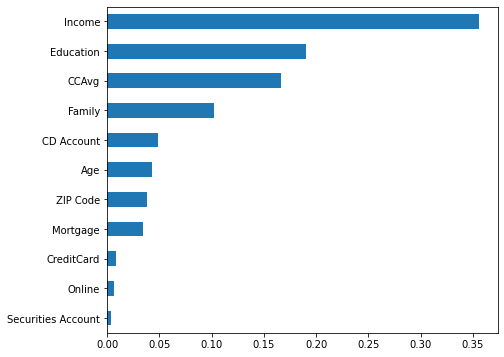

In [56]:
feature_importances = pd.Series(RF_model.feature_importances_, index=X_train.columns)
sorted_features=feature_importances.sort_values()
#feature_importances.plot(kind='barh', figsize=(7,6))
sorted_features.plot(kind='barh', figsize=(7,6))

In [57]:
from sklearn.inspection import plot_partial_dependence

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


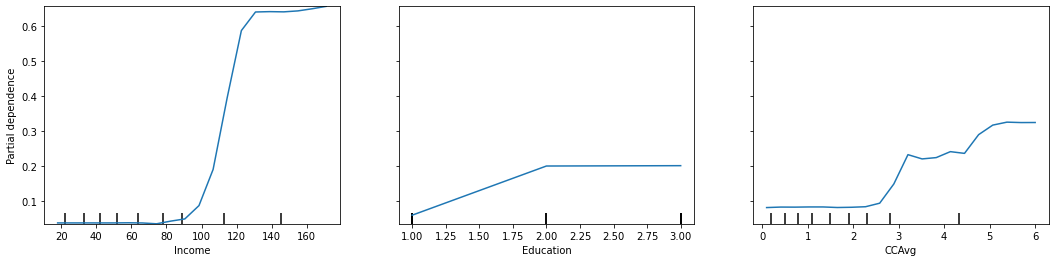

In [59]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Income', "Education", "CCAvg"], 
                        grid_resolution=20, ax=ax)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


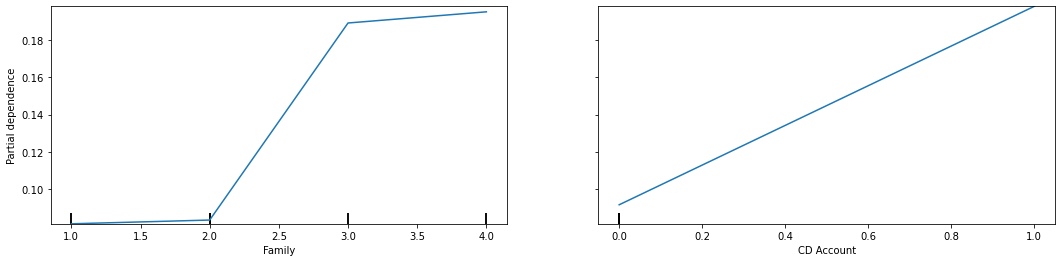

In [60]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['Family', 'CD Account'], 
                        grid_resolution=20, ax=ax)

/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_partial_dependence is deprecated; Function `plot_partial_dependence` is deprecated in 1.0 and will be removed in 1.2. Use PartialDependenceDisplay.from_estimator instead
  warnings.warn(msg, category=FutureWarning)


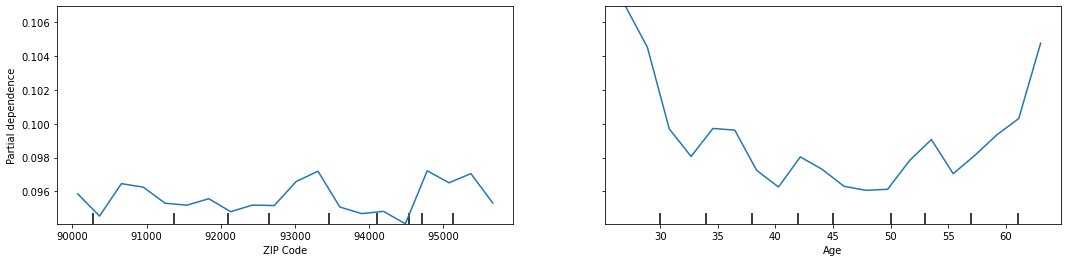

In [61]:
fig, ax = plt.subplots(figsize=(18,4))
plot_partial_dependence(RF_model, X_train, ['ZIP Code', 'Age'], 
                        grid_resolution=20, ax=ax)